In [1]:
#pip install pennylane --upgrade   
#pip install pennylane-qiskit  
#pip install autograd                          

In [1]:
import numpy as np

import matplotlib.pyplot as plt

# Amplitude encoding

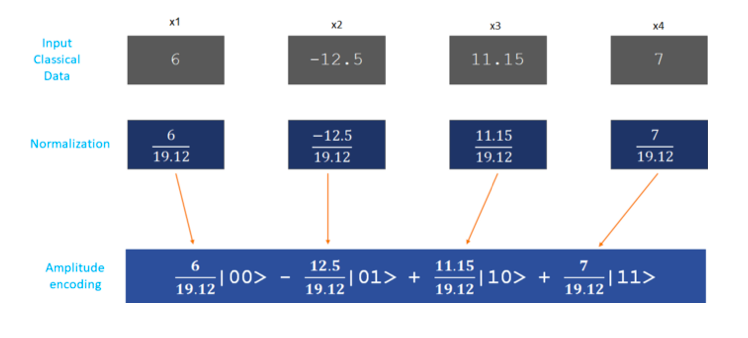

In [11]:
@qml.qnode(dev)
def circuit(f=None):
    qml.AmplitudeEmbedding(features=f, wires=range(2), normalize=True)
    return qml.expval(qml.PauliZ(0))

circuit(f=[6, -12.5, 11.15, 7])
dev.state

tensor([ 0.31380835+0.j,  0.        +0.j, -0.65376739+0.j,
         0.        +0.j,  0.58316051+0.j,  0.        +0.j,
         0.36610974+0.j,  0.        +0.j], requires_grad=True)

In [13]:
print(qml.draw(circuit, expansion_strategy="device")([6, -12.5, 11.15, 7]))

0: ─╭QubitStateVector(M0)─┤  <Z>
1: ─╰QubitStateVector(M0)─┤     


Source code: \
https://pennylane.readthedocs.io/en/stable/_modules/pennylane/templates/embeddings/amplitude.html#AmplitudeEmbedding

# Basis Encoding

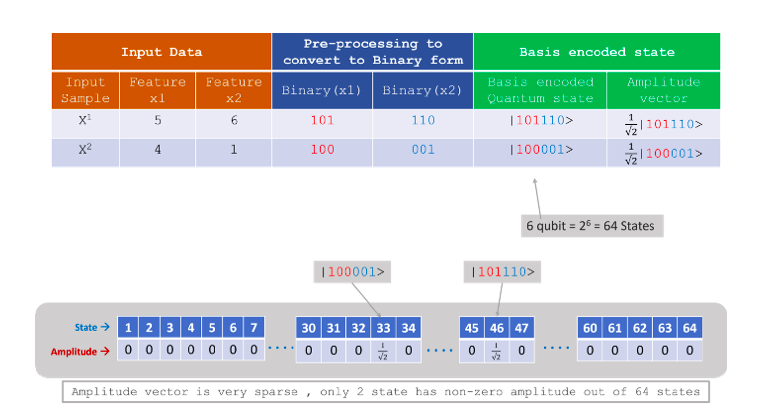

In [4]:
import pennylane as qml

In [5]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(feature_vector):
    qml.BasisEmbedding(features=feature_vector, wires=range(3))
    return qml.state()

X = [0,1,1]

In [6]:
print(circuit(X))

[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [7]:
print(qml.draw(circuit, expansion_strategy="device")(X))

1: ──X─┤  State
2: ──X─┤  State


Source code:
https://pennylane.readthedocs.io/en/stable/_modules/pennylane/templates/embeddings/basis.html#BasisEmbedding

# Angle Encoding

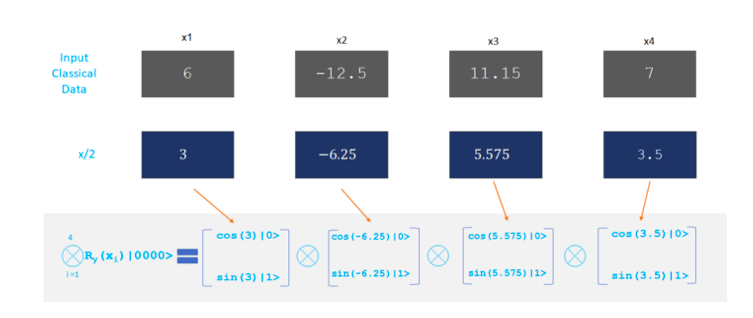

In [28]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(feature_vector):
    qml.AngleEmbedding(features=feature_vector, wires=range(3), rotation='Z')
    qml.Hadamard(0)
    return qml.probs(wires=range(3))

X = [1,2,3]

In [29]:
print(qml.draw(circuit, expansion_strategy="device")(X))

0: ──RZ(1.00)──H─┤ ╭Probs
1: ──RZ(2.00)────┤ ├Probs
2: ──RZ(3.00)────┤ ╰Probs


Source code: https://pennylane.readthedocs.io/en/stable/_modules/pennylane/templates/embeddings/angle.html#AngleEmbedding